In [142]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import (
    GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
)
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split

In [ ]:
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)

## Data Reading

In [ ]:
df= pd.read_csv('/content/dataset_B_training.csv')

In [ ]:
df.head(3)

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children,employment_sector,h1n1_vaccine
0,1,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,4.0,4.0,1.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",2.0,1.0,construction,0
1,2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,1.0,2.0,18 - 34 Years,Some College,White,Female,Below Poverty,Not Married,Own,Employed,Non-MSA,0.0,3.0,wholesale,0
2,3,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,NaN,0.0,0.0,0.0,1.0,3.0,4.0,2.0,45 - 54 Years,College Graduate,White,Female,"> $75,000",Not Married,Own,Employed,"MSA, Principle City",0.0,0.0,real_estate,1


## Data Exploration

In [ ]:
df.info()                      # column types, null counts                  # summary statistics for numeric columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4756 entries, 0 to 4755
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                4756 non-null   int64  
 1   h1n1_concern                 4741 non-null   float64
 2   h1n1_knowledge               4734 non-null   float64
 3   behavioral_antiviral_meds    4739 non-null   float64
 4   behavioral_avoidance         4729 non-null   float64
 5   behavioral_face_mask         4752 non-null   float64
 6   behavioral_wash_hands        4748 non-null   float64
 7   behavioral_large_gatherings  4747 non-null   float64
 8   behavioral_outside_home      4741 non-null   float64
 9   behavioral_touch_face        4736 non-null   float64
 10  doctor_recc_h1n1             4437 non-null   float64
 11  chronic_med_condition        4595 non-null   float64
 12  child_under_6_months         4622 non-null   float64
 13  health_worker     

In [ ]:
df.shape # (rows, columns)


(4756, 31)

In [ ]:
df.columns                     # feature names


Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'chronic_med_condition',
       'child_under_6_months', 'health_worker', 'health_insurance',
       'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'age_group', 'education', 'race', 'sex',
       'income_poverty', 'marital_status', 'rent_or_own', 'employment_status',
       'census_msa', 'household_adults', 'household_children',
       'employment_sector', 'h1n1_vaccine'],
      dtype='object')

In [ ]:
df.describe(include = 'all')

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children,employment_sector,h1n1_vaccine
count,4756.00,4741.000000,4734.00000,4739.000000,4729.00000,4752.000000,4748.000000,4747.000000,4741.000000,4736.000000,4437.000000,4595.000000,4622.000000,4625.000000,2831.000000,4687.000000,4692.000000,4692.000000,4756,4532,4756,4756,4044,4530,4441,4521,4756,4722.000000,4722.000000,2392,4756.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,4,4,2,3,2,2,3,3,NaN,NaN,21,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65+ Years,College Graduate,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",NaN,NaN,media,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1225,1858,3831,2921,2250,2535,3466,2419,2120,NaN,NaN,546,NaN
mean,2378.50,1.658933,1.30714,0.057396,0.74096,0.077652,0.842039,0.359385,0.341278,0.704814,0.290286,0.314037,0.090437,0.141189,0.901801,3.965436,2.512361,2.412191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.888818,0.542143,NaN,0.394029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
min,1.00,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000
25%,1189.75,1.000000,1.00000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000
50%,2378.50,2.000000,1.00000,0.000000,1.00000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,0.000000
75%,3567.25,2.000000,2.00000,0.000000,1.00000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,5.000000,4.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,1.000000


In [ ]:
df.isnull().sum().head(5)

,0
respondent_id,0
h1n1_concern,15
h1n1_knowledge,22
behavioral_antiviral_meds,17
behavioral_avoidance,27


## Data Imputation Methods

In [ ]:
ohe_features = ["sex", "income_poverty", "rent_or_own", "census_msa", "employment_sector"]
ord_features = ["age_group", "education", "marital_status", "employment_status"]

age_order = [
    "18 - 34 Years", "35 - 44 Years", "45 - 54 Years",
    "55 - 64 Years", "65+ Years"
]

edu_order = ["< 12 Years", "12 Years", "Some College", "College Graduate"]

marital_order = ["Not Married", "Married"]

emp_order = ["Not in Labor Force", "Unemployed", "Employed"]

ordinal_categories = [age_order, edu_order, marital_order, emp_order]


ohe_tf = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy = "most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown = "ignore", sparse_output = False))
])

ord_tf = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy = "most_frequent")),
    ("ord", OrdinalEncoder(categories = ordinal_categories, handle_unknown = "use_encoded_value", unknown_value = -1))
])

preprocess = ColumnTransformer(
    transformers = [
        ("ohe", ohe_tf, ohe_features),
        ("ord", ord_tf, ord_features),
    ],
    remainder = "drop"
)


X = df.drop(columns = ["h1n1_vaccine"])
X_transformed = preprocess.fit_transform(X)

ohe_feature_names = preprocess.named_transformers_["ohe"]["ohe"].get_feature_names_out(ohe_features)
ord_feature_names = ord_features
all_names = np.concatenate([ohe_feature_names, ord_feature_names])
X_prepared = pd.DataFrame(X_transformed, columns = all_names, index = df.index)

In [ ]:
X_prepared.columns = (
    X_prepared.columns
    .str.lower()
    .str.replace('[^a-z0-9]+', '_', regex = True)
    .str.strip('_')
)

In [ ]:
X_prepared.head(5)

,sex_female,sex_male,income_poverty_75_000_above_poverty,income_poverty_75_000,income_poverty_below_poverty,rent_or_own_own,rent_or_own_rent,census_msa_msa_not_principle_city,census_msa_msa_principle_city,census_msa_non_msa,employment_sector_administrative,employment_sector_agriculture,employment_sector_construction,employment_sector_education,employment_sector_energy,employment_sector_entertainment,employment_sector_finance,employment_sector_government,employment_sector_healthcare,employment_sector_hospitality,employment_sector_manufacturing,employment_sector_media,employment_sector_mining,employment_sector_real_estate,employment_sector_retail,employment_sector_science,employment_sector_services,employment_sector_technology,employment_sector_transportation,employment_sector_utilities,employment_sector_wholesale,age_group,education,marital_status,employment_status
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0,2.0
1,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,2.0
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,0.0,2.0
3,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
len(X_prepared.columns)

35

## Principal Component Analysis

### Feature transformation

Features 1 to 35 were obtained through Encoding.

We're transforming them using PCA.

In [ ]:
pca = PCA(n_components = X_prepared.columns, copy = True, whiten = False, svd_solver = 'auto', tol = 0.0, iterated_power = 'auto', n_oversamples = 10, power_iteration_normalizer = 'auto', random_state = 42)

In [ ]:
# Choose how many components:
#  - int (e.g., 20)
#  - float between 0 and 1 to keep that fraction of variance (e.g., 0.95)
#  - None to keep all
n_comp = 0.95

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components = n_comp, random_state = 42, svd_solver = "auto", whiten = False))
])

X_pca = pipe.fit_transform(X_prepared)


pca_cols = [f"pc{i+1}" for i in range(X_pca.shape[1])]
PCA_df = pd.DataFrame(X_pca, columns = pca_cols, index = X_prepared.index)

explained = pipe.named_steps["pca"].explained_variance_ratio_
cum_explained = np.cumsum(explained)

In [ ]:
PCA_df.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,pc17,pc18,pc19,pc20,pc21,pc22,pc23,pc24,pc25,pc26,pc27
0,-1.147065,0.754296,-1.613464,1.913713,1.220512,0.148576,0.689048,2.736629,-0.818970,-0.042504,-0.063832,0.080895,-0.132976,-0.510909,-0.148250,-0.061834,0.108124,-0.179503,0.081158,-0.226689,0.198477,0.210073,-0.683669,0.120229,-0.858440,0.344033,-0.305882
1,-0.485522,-1.275628,-1.477991,-0.577291,-1.227020,2.619027,0.193421,-0.630998,3.628418,-1.586912,-0.478023,-0.629404,0.140218,-0.865030,-0.889125,0.319137,0.276123,0.108752,-0.224139,-0.383436,0.333726,-0.286997,0.622596,0.790968,-0.712857,2.334822,-2.473694
2,-1.962598,-0.289674,-2.229455,-0.416016,-2.027951,-1.308294,-0.906778,-1.858923,-0.824785,3.209940,1.017732,-0.853430,-1.419685,-1.013617,-0.975362,0.177511,0.467570,-0.199940,0.286681,-0.452238,0.247912,0.098082,-0.028216,0.921747,-0.523884,1.238451,-0.134739
3,2.636213,-1.391707,-0.816203,0.588835,-0.348190,0.608055,2.243250,-0.712962,-0.081003,-0.174475,0.162773,0.038727,-0.040334,-0.053044,0.142600,0.118234,0.059695,0.091740,-0.044543,-0.013369,0.098730,-0.258156,0.498125,0.778223,0.574115,-1.175056,-0.474883
4,1.828790,0.473963,0.017005,1.253717,-0.673914,1.684599,-0.117911,-0.614224,-0.197508,-0.285580,-0.178344,-0.057174,-0.016064,-0.119794,0.007513,0.173385,0.016259,0.022229,-0.063412,0.071110,0.050098,-0.115108,0.501396,0.001856,0.148530,0.333792,-1.208846


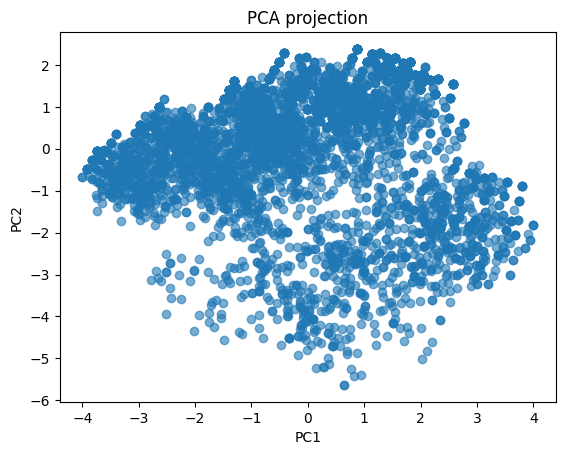

In [ ]:
plt.scatter(PCA_df["pc1"], PCA_df["pc2"], alpha = 0.6)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA projection")
plt.show()

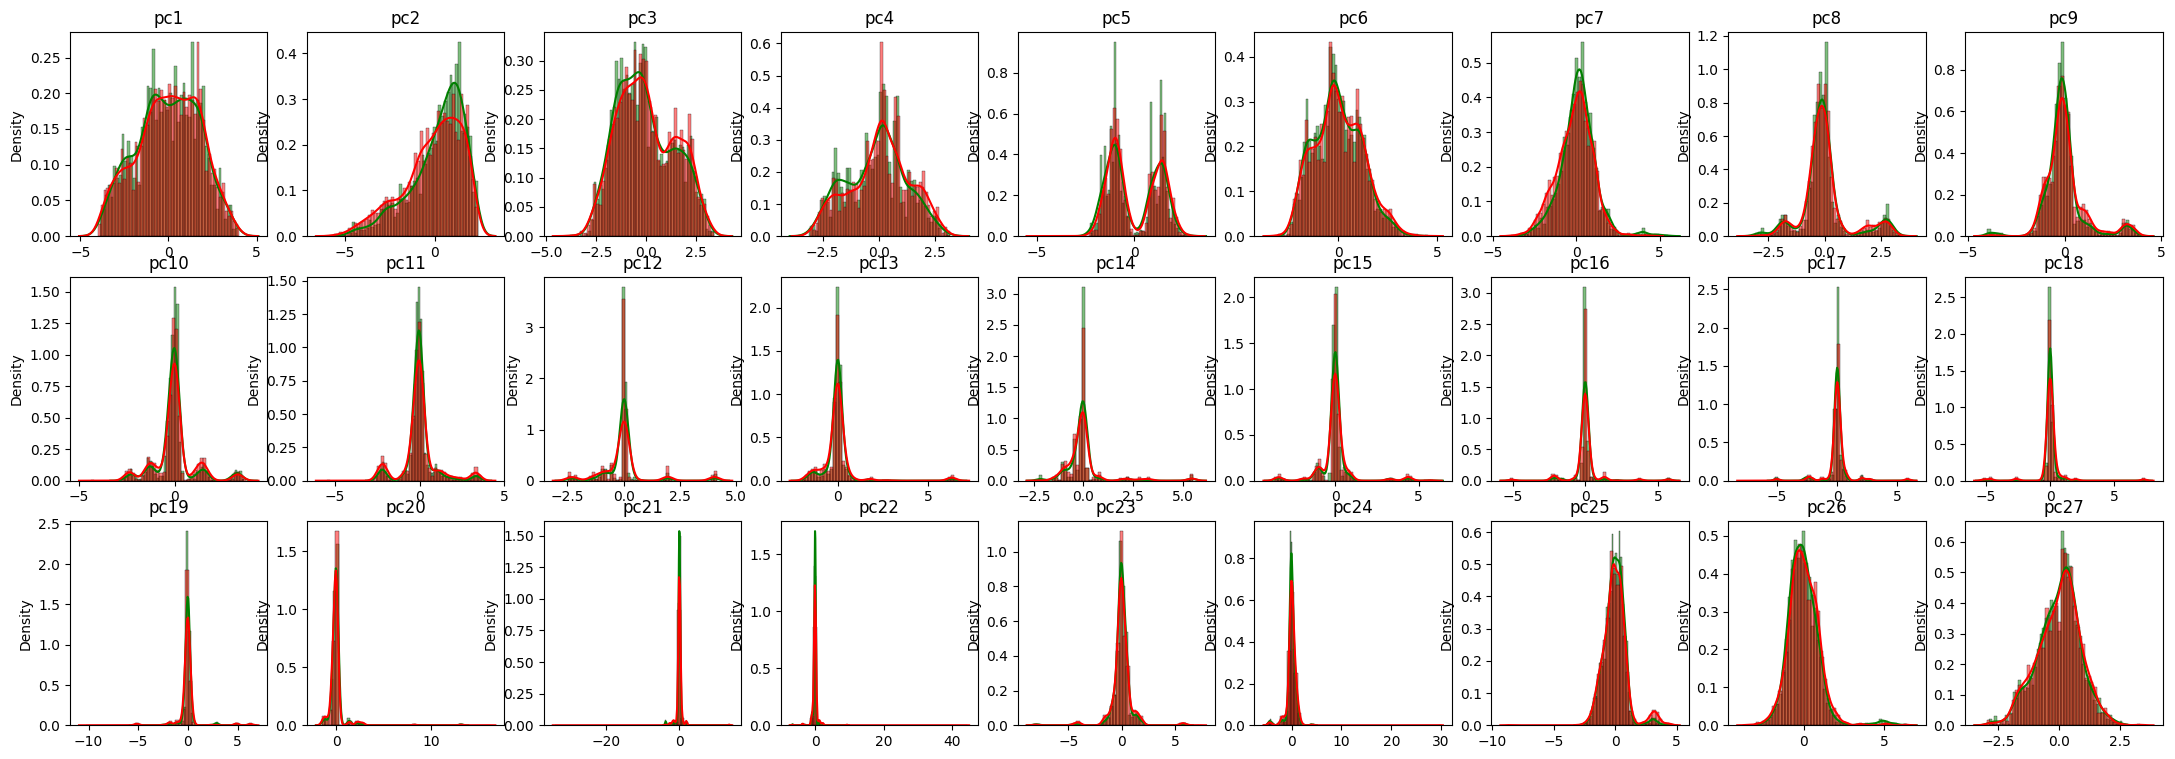

In [ ]:
import matplotlib.gridspec as gridspec

columns = PCA_df.columns

grid = gridspec.GridSpec(3, 9)

plt.figure(figsize = (27, 9))

for n, col in enumerate(PCA_df[columns]):
    ax = plt.subplot(grid[n])
    sns.histplot(
        PCA_df[df["h1n1_vaccine"] == 1][col],
        bins = 50,
        kde = "True",
        stat = "density",
        kde_kws = dict(cut = 3),
        color = "g",
    )
    sns.histplot(
        PCA_df[df["h1n1_vaccine"] == 0][col],
        bins = 50,
        kde = "True",
        stat = "density",
        kde_kws = dict(cut = 3),
        color = "r",
    )
    ax.set_ylabel("Density")
    ax.set_title(str(col))
    ax.set_xlabel("")

plt.show()

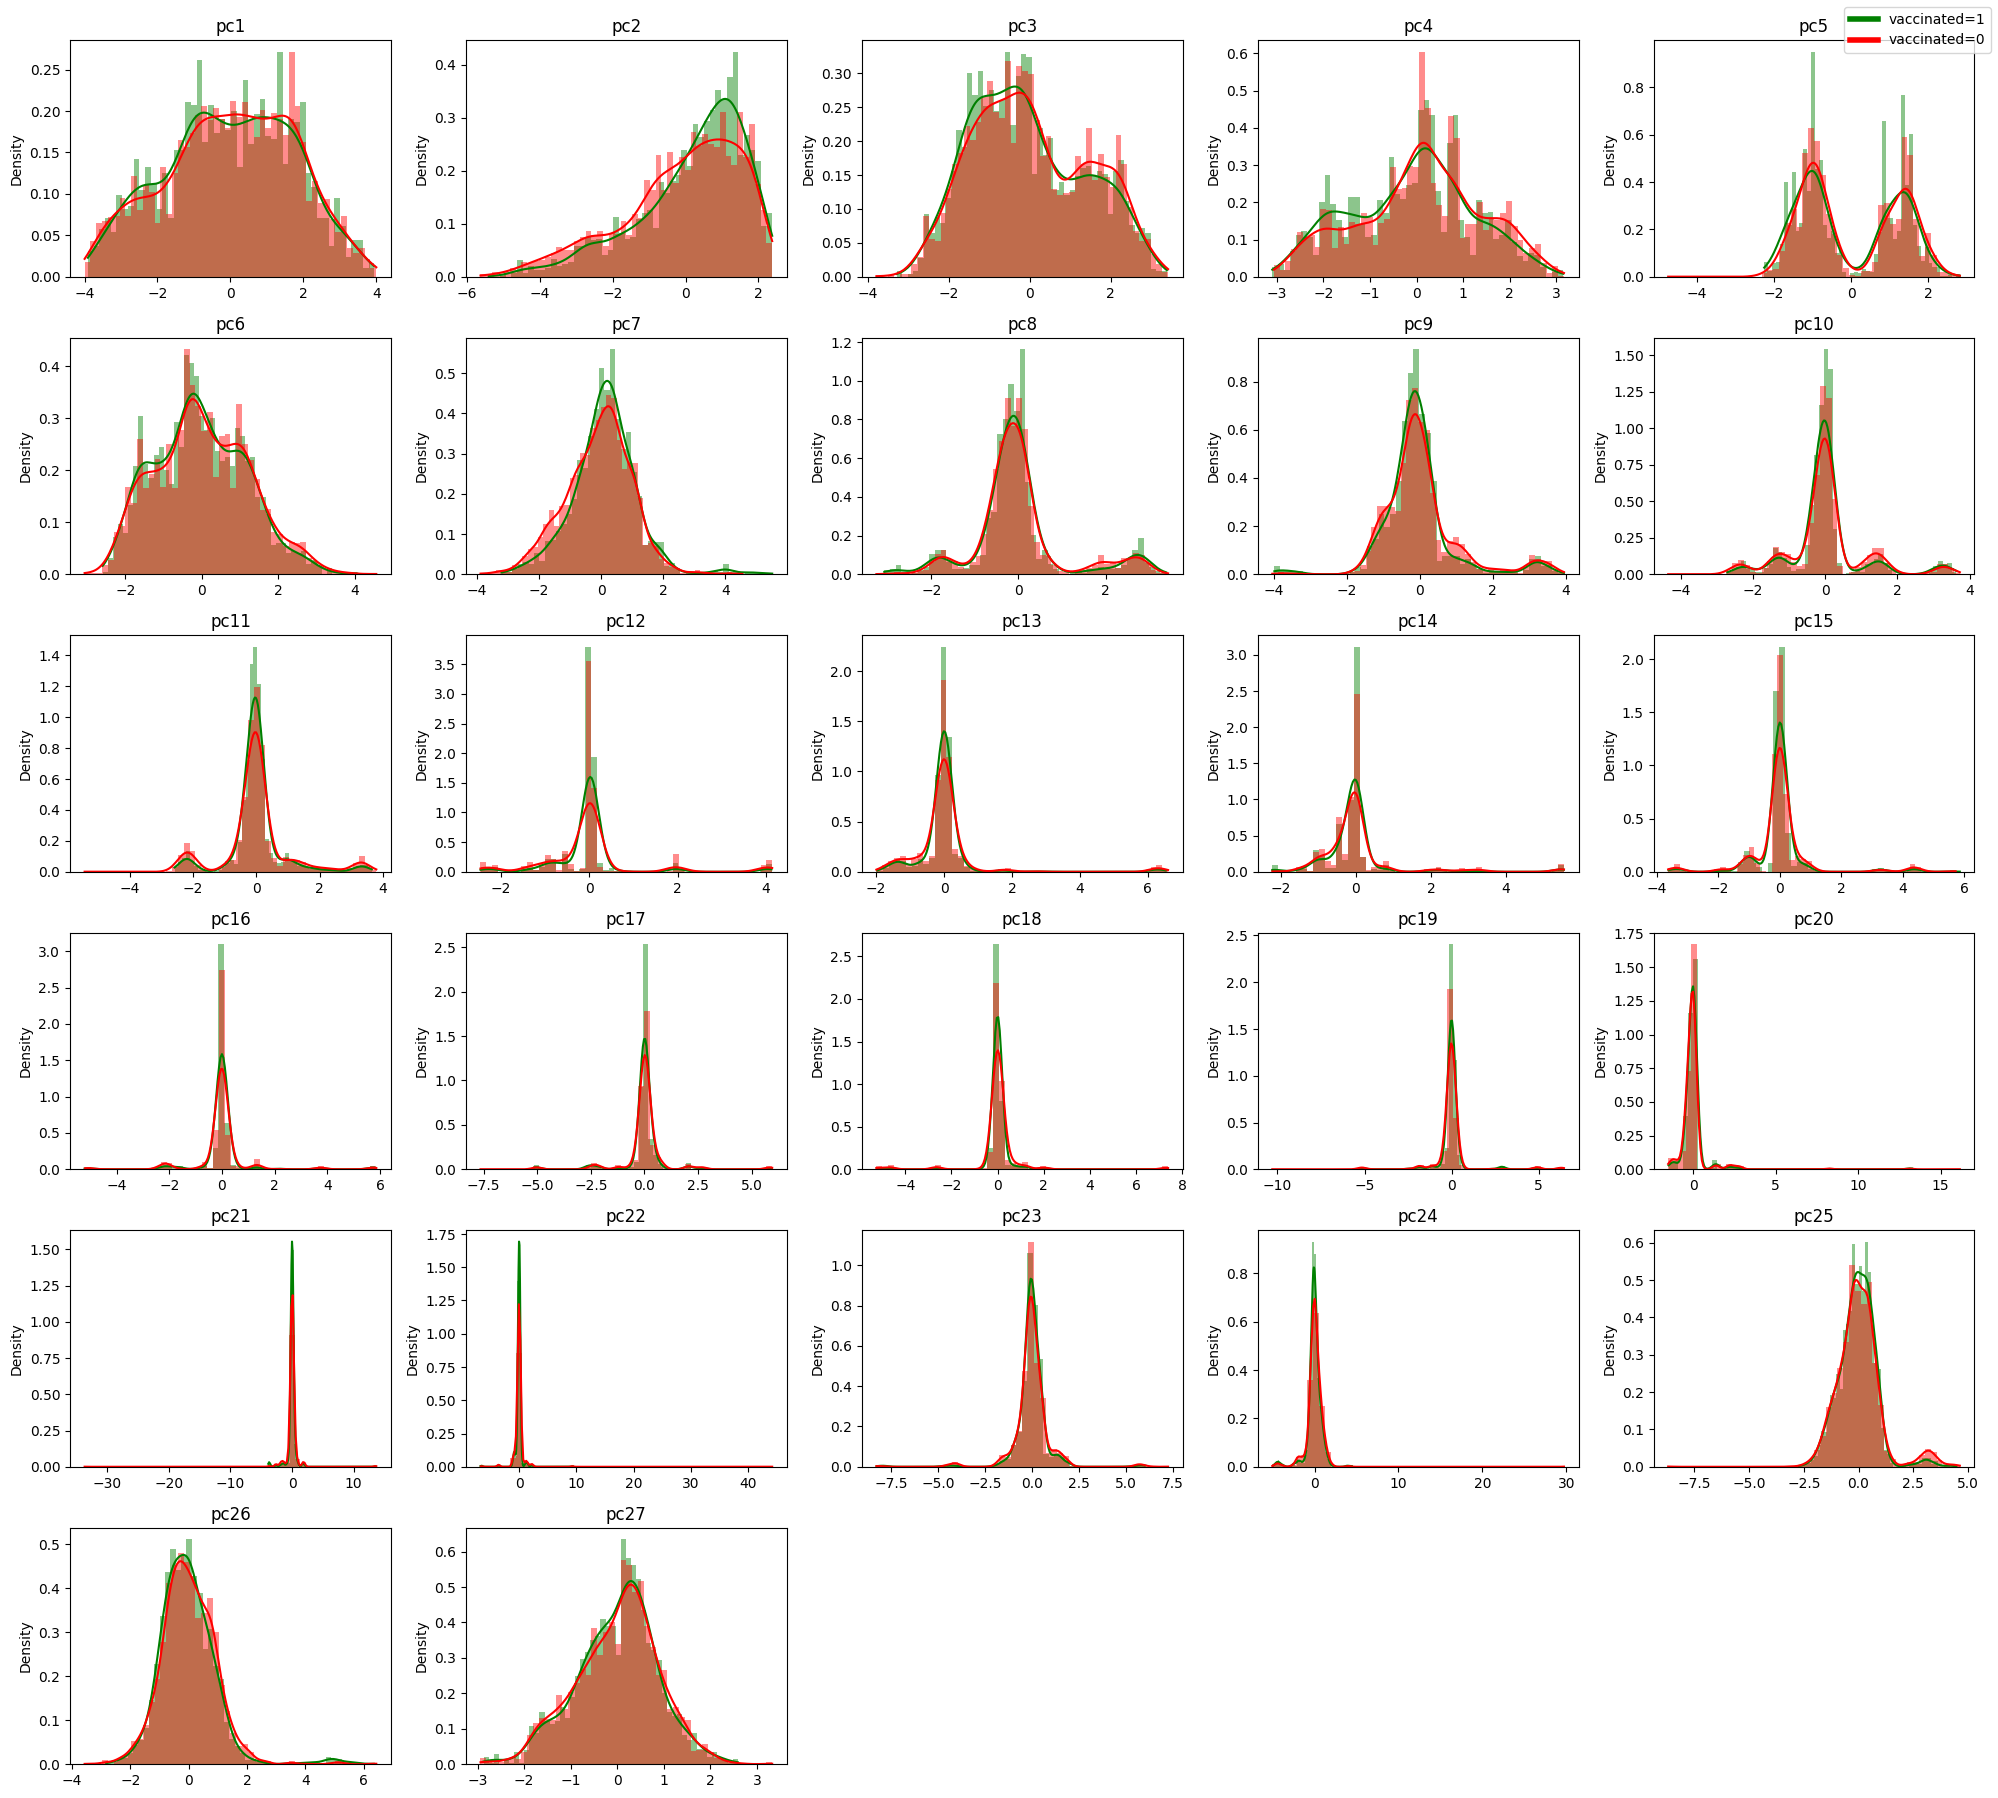

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

assert PCA_df.index.equals(df.index), "PCA_df and df indices must align."

y = df["h1n1_vaccine"].values
cols = PCA_df.columns

n = len(cols)
ncols = 5
nrows = math.ceil(n / ncols)

fig = plt.figure(figsize=(4*ncols, 3*nrows))
gs = plt.GridSpec(nrows, ncols, figure=fig)

for i, col in enumerate(cols):
    r, c = divmod(i, ncols)
    ax = fig.add_subplot(gs[r, c])
    sns.histplot(PCA_df.loc[y==1, col], bins=50, kde=True, stat="density",
                 alpha=0.45, color="g", edgecolor=None, ax=ax)
    sns.histplot(PCA_df.loc[y==0, col], bins=50, kde=True, stat="density",
                 alpha=0.45, color="r", edgecolor=None, ax=ax)
    ax.set_title(col)
    ax.set_xlabel("")
    ax.set_ylabel("Density")

# single legend
handles = [plt.Line2D([0],[0], color="g", lw=4, label="vaccinated=1"),
           plt.Line2D([0],[0], color="r", lw=4, label="vaccinated=0")]
fig.legend(handles=handles, loc="upper right")
fig.tight_layout()
plt.show()


In [ ]:
X_pca_red = PCA_df.drop(["pc25", "pc26", "pc27", "pc20", "pc6", "pc16", "pc12", "pc15"], axis = 1)

In [ ]:
X_pca_red.head()

,pc1,pc2,pc3,pc4,pc5,pc7,pc8,pc9,pc10,pc11,pc13,pc14,pc17,pc18,pc19,pc21,pc22,pc23,pc24
0,-1.147065,0.754296,-1.613464,1.913713,1.220512,0.689048,2.736629,-0.818970,-0.042504,-0.063832,-0.132976,-0.510909,0.108124,-0.179503,0.081158,0.198477,0.210073,-0.683669,0.120229
1,-0.485522,-1.275628,-1.477991,-0.577291,-1.227020,0.193421,-0.630998,3.628418,-1.586912,-0.478023,0.140218,-0.865030,0.276123,0.108752,-0.224139,0.333726,-0.286997,0.622596,0.790968
2,-1.962598,-0.289674,-2.229455,-0.416016,-2.027951,-0.906778,-1.858923,-0.824785,3.209940,1.017732,-1.419685,-1.013617,0.467570,-0.199940,0.286681,0.247912,0.098082,-0.028216,0.921747
3,2.636213,-1.391707,-0.816203,0.588835,-0.348190,2.243250,-0.712962,-0.081003,-0.174475,0.162773,-0.040334,-0.053044,0.059695,0.091740,-0.044543,0.098730,-0.258156,0.498125,0.778223
4,1.828790,0.473963,0.017005,1.253717,-0.673914,-0.117911,-0.614224,-0.197508,-0.285580,-0.178344,-0.016064,-0.119794,0.016259,0.022229,-0.063412,0.050098,-0.115108,0.501396,0.001856


In [ ]:
len(X_pca_red.head().columns)

19

In [ ]:
X_pca_red.info()
X_pca_red.isnull().sum()
X_pca_red.describe(include = 'all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4756 entries, 0 to 4755
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pc1     4756 non-null   float64
 1   pc2     4756 non-null   float64
 2   pc3     4756 non-null   float64
 3   pc4     4756 non-null   float64
 4   pc5     4756 non-null   float64
 5   pc7     4756 non-null   float64
 6   pc8     4756 non-null   float64
 7   pc9     4756 non-null   float64
 8   pc10    4756 non-null   float64
 9   pc11    4756 non-null   float64
 10  pc13    4756 non-null   float64
 11  pc14    4756 non-null   float64
 12  pc17    4756 non-null   float64
 13  pc18    4756 non-null   float64
 14  pc19    4756 non-null   float64
 15  pc21    4756 non-null   float64
 16  pc22    4756 non-null   float64
 17  pc23    4756 non-null   float64
 18  pc24    4756 non-null   float64
dtypes: float64(19)
memory usage: 706.1 KB


,pc1,pc2,pc3,pc4,pc5,pc7,pc8,pc9,pc10,pc11,pc13,pc14,pc17,pc18,pc19,pc21,pc22,pc23,pc24
count,4.756000e+03,4.756000e+03,4.756000e+03,4.756000e+03,4.756000e+03,4.756000e+03,4.756000e+03,4.756000e+03,4.756000e+03,4.756000e+03,4.756000e+03,4.756000e+03,4.756000e+03,4.756000e+03,4.756000e+03,4.756000e+03,4.756000e+03,4.756000e+03,4.756000e+03
mean,-1.613512e-16,9.038653e-16,5.721990e-16,6.215008e-16,1.643392e-16,2.465087e-16,1.190712e-15,-6.722965e-17,-4.198118e-16,-1.142904e-16,-3.615461e-16,-2.539787e-17,-5.871390e-16,7.469961e-17,-8.299127e-16,-1.688211e-16,5.161743e-16,-1.142904e-16,1.777851e-16
std,1.754967e+00,1.578955e+00,1.409370e+00,1.320864e+00,1.260027e+00,1.061592e+00,1.026904e+00,1.023060e+00,1.017917e+00,1.016536e+00,1.012149e+00,1.009636e+00,1.005704e+00,1.004340e+00,1.003620e+00,1.001836e+00,9.998390e-01,9.954531e-01,9.915075e-01
min,-3.998246e+00,-5.633242e+00,-3.785187e+00,-3.096762e+00,-4.745437e+00,-3.886977e+00,-3.260238e+00,-4.043321e+00,-4.356653e+00,-5.436575e+00,-1.994764e+00,-2.229745e+00,-7.642515e+00,-5.250225e+00,-1.029932e+01,-3.366989e+01,-6.725800e+00,-8.276636e+00,-5.030418e+00
25%,-1.208611e+00,-8.959157e-01,-1.105908e+00,-9.372222e-01,-1.056031e+00,-6.389120e-01,-4.268546e-01,-4.809479e-01,-2.586004e-01,-2.514618e-01,-1.664201e-01,-3.854949e-01,-6.596281e-02,-6.001531e-02,-1.130953e-01,-8.953465e-02,-1.170145e-01,-2.487596e-01,-2.861839e-01
50%,7.560075e-02,3.437153e-01,-1.651407e-01,1.434180e-01,-5.365673e-01,7.508621e-02,-1.306580e-01,-1.377932e-01,-2.626330e-02,-2.322367e-02,-1.648338e-02,-3.919219e-02,6.832845e-03,1.251631e-02,-1.474048e-02,2.467395e-02,1.882449e-02,-9.061169e-03,1.168489e-02
75%,1.369437e+00,1.213155e+00,1.158150e+00,8.312750e-01,1.323428e+00,6.437899e-01,1.507039e-01,2.452197e-01,1.488779e-01,1.659585e-01,9.970537e-02,1.539702e-02,1.188500e-01,7.799278e-02,7.508187e-02,1.270658e-01,1.181759e-01,3.055179e-01,4.018306e-01
max,3.999150e+00,2.380349e+00,3.422148e+00,3.166189e+00,2.823313e+00,5.512129e+00,3.434601e+00,3.950554e+00,3.730536e+00,3.795326e+00,6.593803e+00,5.543403e+00,5.952656e+00,7.380822e+00,6.443766e+00,1.368151e+01,4.414409e+01,7.260917e+00,2.971619e+01


In [143]:
def train_and_predict(X, y, model, random_state = 42):

    #Split into train/test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size = 0.3, random_state = random_state
    )

    # Define the model
    model = model(random_state = random_state)

    # Train the model on original data
    model.fit(X_train, y_train)

    # Make predictions
    predictions = model.predict(X_test)

    accuracy = accuracy_score(y_test, predictions)

    print(classification_report(y_test, predictions))

    return X_train, X_test, y_train, y_test, predictions, accuracy

In [148]:
X = X_pca_red,
Y = df["h1n1_vaccine"]

models = [GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier, DecisionTreeClassifier, LogisticRegression]

for model in models:
    print(f"Classification Report for {model.__name__} model:\n")
    _, _, _, _, pred, acc, = train_and_predict(X_pca_red, Y, model = model)
    print("\n")

Classification Report for GradientBoostingClassifier model:

              precision    recall  f1-score   support

           0       0.60      0.90      0.72       850
           1       0.47      0.14      0.21       577

    accuracy                           0.59      1427
   macro avg       0.54      0.52      0.47      1427
weighted avg       0.55      0.59      0.52      1427

Classification Report for AdaBoostClassifier model:

              precision    recall  f1-score   support

           0       0.61      0.93      0.74       850
           1       0.54      0.13      0.21       577

    accuracy                           0.60      1427
   macro avg       0.58      0.53      0.47      1427
weighted avg       0.58      0.60      0.52      1427

Classification Report for RandomForestClassifier model:

              precision    recall  f1-score   support

           0       0.61      0.71      0.66       850
           1       0.44      0.33      0.38       577

    accurac